# Project

# Goal
## 1. Data Preprocessing and  Exploration



### 1.1. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem import WordNetLemmatizer
import re
from nltk.tokenize import word_tokenize


*Your comments here*

### 1.2.Data preprocessing

In [12]:
data = pd.read_csv('mbti_1.csv', header = 0)
data.head()


type                                              posts
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1  ENTP  'I'm finding the lack of me in these posts ver...
2  INTP  'Good one  _____   https://www.youtube.com/wat...
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...
4  ENTJ  'You're fired.|||That's another silly misconce...

In [13]:
data.isnull().sum()


type     0
posts    0
dtype: int64

In [14]:
data["type"].value_counts()


INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64

In [15]:


ct = data['type'].value_counts()

counts = pd.DataFrame({'type': ct.index, 'count': ct.values})

# Create a new column with the percentage of total counts
counts['percent'] = counts['count'] / counts['count'].sum() * 100

counts = counts.sort_values('count', ascending=False)

counts

type  count    percent
0   INFP   1832  21.118156
1   INFJ   1470  16.945245
2   INTP   1304  15.031700
3   INTJ   1091  12.576369
4   ENTP    685   7.896254
5   ENFP    675   7.780980
6   ISTP    337   3.884726
7   ISFP    271   3.123919
8   ENTJ    231   2.662824
9   ISTJ    205   2.363112
10  ENFJ    190   2.190202
11  ISFJ    166   1.913545
12  ESTP     89   1.025937
13  ESFP     48   0.553314
14  ESFJ     42   0.484150
15  ESTJ     39   0.449568

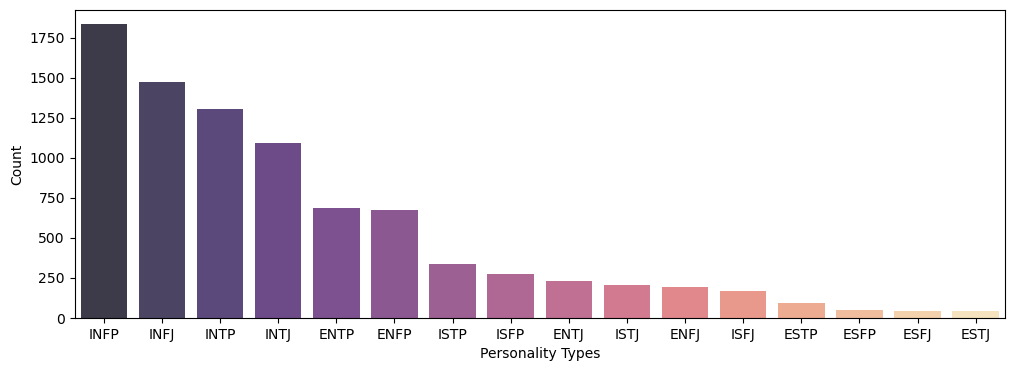

In [16]:
plt.figure(figsize=(12,4))
sns.barplot(x = ct.index, y=ct.values, alpha=0.8, palette='magma')
plt.ylabel('Count')
plt.xlabel('Personality Types')
plt.show()

## 2. Tokenize 

In [17]:
import nltk
nltk.download('stopwords')

Stop = stopwords.words('english')
lemmatizer = WordNetLemmatizer()


regex = re.compile("[^a-zA-Z ]")
regex2 = re.compile("[…\+,'’]")

# Define a list of personality types to remove from the text
personality_types = [x.lower() for x in data["type"].unique()]

def tokenizer(text):
    # Remove URLs and numbers
    post = re.sub(r'''https?:\/\/[^| ]+''', '', text, flags=re.MULTILINE)
    post = re.sub(r'''[0-9]+''', '', post, flags=re.MULTILINE)
#     # Replace '|||' with a space
#     post = post.replace('|||', ' ')

    # Remove punctuation
    post = regex.sub(' ', post)
    # Remove specific characters
    post = regex2.sub('', post)
    # Remove extra white spaces
    text = re.sub('\s+', ' ', post).strip()
    
    # Tokenize the text
    words = word_tokenize(text)
    words = [x.lower() for x in words]
    
    words = [x for x in words if x not in Stop]
    
    # Remove personality types
    words = [x for x in words if x not in personality_types]
    
    # Lemmatize the words
    words = [lemmatizer.lemmatize(word) for word in words]
    
    return words


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\budhr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

data["post_token"] = data["posts"].apply(tokenizer)
data.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\budhr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\budhr\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\budhr\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


type                                              posts  \
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...   
1  ENTP  'I'm finding the lack of me in these posts ver...   
2  INTP  'Good one  _____   https://www.youtube.com/wat...   
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...   
4  ENTJ  'You're fired.|||That's another silly misconce...   

                                          post_token  
0  [moment, sportscenter, top, ten, play, prank, ...  
1  [finding, lack, post, alarming, sex, boring, p...  
2  [good, one, course, say, know, blessing, curse...  
3  [dear, enjoyed, conversation, day, esoteric, g...  
4  [fired, another, silly, misconception, approac...

In [19]:
data['text_tokens'] = data['post_token'].apply(lambda x: ' '.join(x))
data.head()

type                                              posts  \
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...   
1  ENTP  'I'm finding the lack of me in these posts ver...   
2  INTP  'Good one  _____   https://www.youtube.com/wat...   
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...   
4  ENTJ  'You're fired.|||That's another silly misconce...   

                                          post_token  \
0  [moment, sportscenter, top, ten, play, prank, ...   
1  [finding, lack, post, alarming, sex, boring, p...   
2  [good, one, course, say, know, blessing, curse...   
3  [dear, enjoyed, conversation, day, esoteric, g...   
4  [fired, another, silly, misconception, approac...   

                                         text_tokens  
0  moment sportscenter top ten play prank life ch...  
1  finding lack post alarming sex boring position...  
2  good one course say know blessing curse absolu...  
3  dear enjoyed conversation day esoteric gabbing...  
4  fired another silly misconception approaching ...

In [10]:
# 'Compound' ranging from -1 to 1, where -1 indicates extremely negative sentiment and 1 indicates extremely positive sentiment.
# 'Negative' represents the score given to the negative sentiment of the text, ranging from 0 to 1.
# 'Neutral' represents the score given to the neutral sentiment of the text, ranging from 0 to 1.
# 'Positive' represents the score given to the positive sentiment of the text, ranging from 0 to 1.

In [20]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

senti = data.copy()
analyzer = SentimentIntensityAnalyzer()

senti[['Compound', 'Negative', 'Neutral', 'Positive']] = senti['text_tokens'].apply(lambda x: pd.Series(analyzer.polarity_scores(x)))



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\budhr\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [21]:
senti = senti.drop(columns = "posts")
senti = senti.drop(columns = "post_token")

senti.head()


type                                        text_tokens  Compound  \
0  INFJ  moment sportscenter top ten play prank life ch...     0.131   
1  ENTP  finding lack post alarming sex boring position...     0.119   
2  INTP  good one course say know blessing curse absolu...     0.116   
3  INTJ  dear enjoyed conversation day esoteric gabbing...     0.087   
4  ENTJ  fired another silly misconception approaching ...     0.186   

   Negative  Neutral  Positive  
0     0.598    0.270    0.9924  
1     0.598    0.284    0.9987  
2     0.581    0.303    0.9985  
3     0.661    0.252    0.9985  
4     0.538    0.276    0.9930

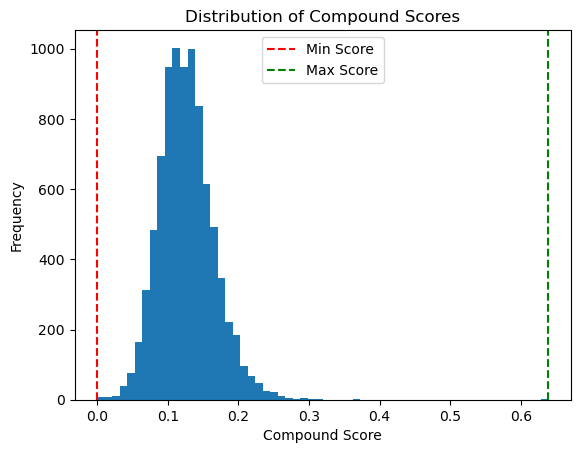

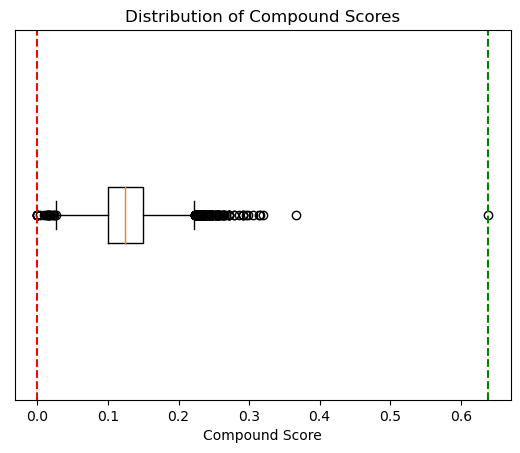

In [37]:
min_score = senti['Compound'].min()
max_score = senti['Compound'].max()

fig, ax = plt.subplots()
ax.hist(senti['Compound'], bins=60)
ax.axvline(x=min_score, color='red', linestyle='--', label='Min Score')
ax.axvline(x=max_score, color='green', linestyle='--', label='Max Score')
ax.set_xlabel('Compound Score')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Compound Scores')
ax.legend()
plt.show()


# Create a box plot for the compound score
plt.boxplot(senti['Compound'], vert=False)

# Add a vertical line at the maximum value
plt.axvline(max_score, color='green', linestyle='dashed')
plt.axvline(min_score, color='red', linestyle='dashed')

plt.title('Distribution of Compound Scores')
plt.xlabel('Compound Score')
plt.yticks([])
plt.show()


In [13]:
for i, letter in enumerate("ESTJ"):
    senti[f"{letter}"] = senti["type"].apply(lambda x: int(x[i] == letter))


In [14]:
senti.head()

type                                        text_tokens  Compound  \
0  INFJ  moment sportscenter top ten play prank life ch...     0.131   
1  ENTP  finding lack post alarming sex boring position...     0.119   
2  INTP  good one course say know blessing curse absolu...     0.116   
3  INTJ  dear enjoyed conversation day esoteric gabbing...     0.087   
4  ENTJ  fired another silly misconception approaching ...     0.186   

   Negative  Neutral  Positive  E  S  T  J  
0     0.598    0.270    0.9924  0  0  0  1  
1     0.598    0.284    0.9987  1  0  1  0  
2     0.581    0.303    0.9985  0  0  1  0  
3     0.661    0.252    0.9985  0  0  1  1  
4     0.538    0.276    0.9930  1  0  1  1

In [15]:
print(f"Total Introverts: {senti['E'].value_counts()[0]}")
print(f"Total Extroverts: {senti['E'].value_counts()[1]}")
print(f"Total Intuition: {senti['S'].value_counts()[0]}")

sensing_count = senti['S'].value_counts()
if 1 in sensing_count.index:
    print(f"Total Sensing: {sensing_count[1]}")
else:
    print("No instances of sensing type found")

print(f"Total Feeling: {senti['T'].value_counts()[0]}")
print(f"Total Thinking: {senti['T'].value_counts()[1]}")
print(f"Total Perceiving: {senti['J'].value_counts()[0]}")
print(f"Total Judging: {senti['J'].value_counts()[1]}")


Total Introverts: 6676
Total Extroverts: 1999
Total Intuition: 7478
Total Sensing: 1197
Total Feeling: 4694
Total Thinking: 3981
Total Perceiving: 5241
Total Judging: 3434


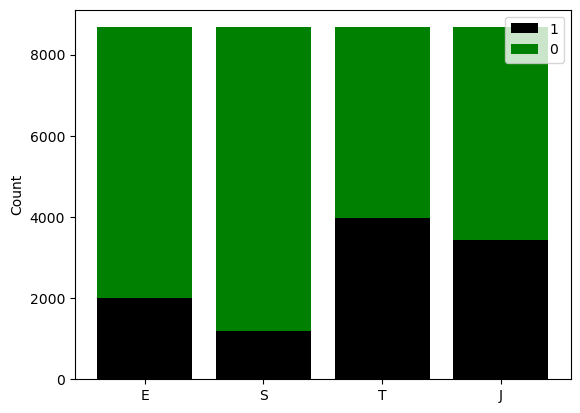

In [16]:
import matplotlib.pyplot as plt
import numpy as np

data_senti = senti[["E", "S", "T", "J"]].sum()
labels = list(data_senti.index)
x = np.arange(len(labels))

fig, ax = plt.subplots()
ax.bar(x, data_senti, color='black', label='1')
ax.bar(x, (senti.shape[0] - data_senti), bottom=data_senti, color='green', label='0')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.set_ylabel('Count')
plt.show()


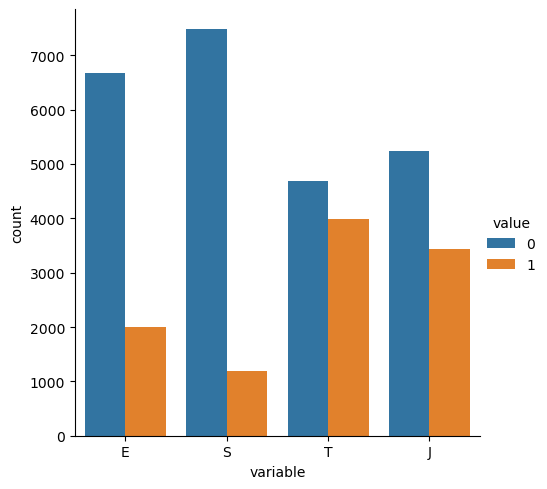

In [17]:
mbtitype = pd.melt(senti[["E", "S", "T", "J"]])
sns.catplot(x="variable", hue="value", kind="count", data=mbtitype)
plt.show()


In [38]:
senti.to_csv('final.csv', index = False)

### 2.2. 

This code creates four new columns "Extrovert", "Sensing", "Thinking", and "Judging" based on the "type".

Each column is assigned a value of 1 if the corresponding letter (E, S, T, or J) is present in the "type" column, otherwise, it is assigned a value of 0.

This can be useful for later analysis and modeling to see if there is any correlation between a person's personality type and their language use or sentiment.


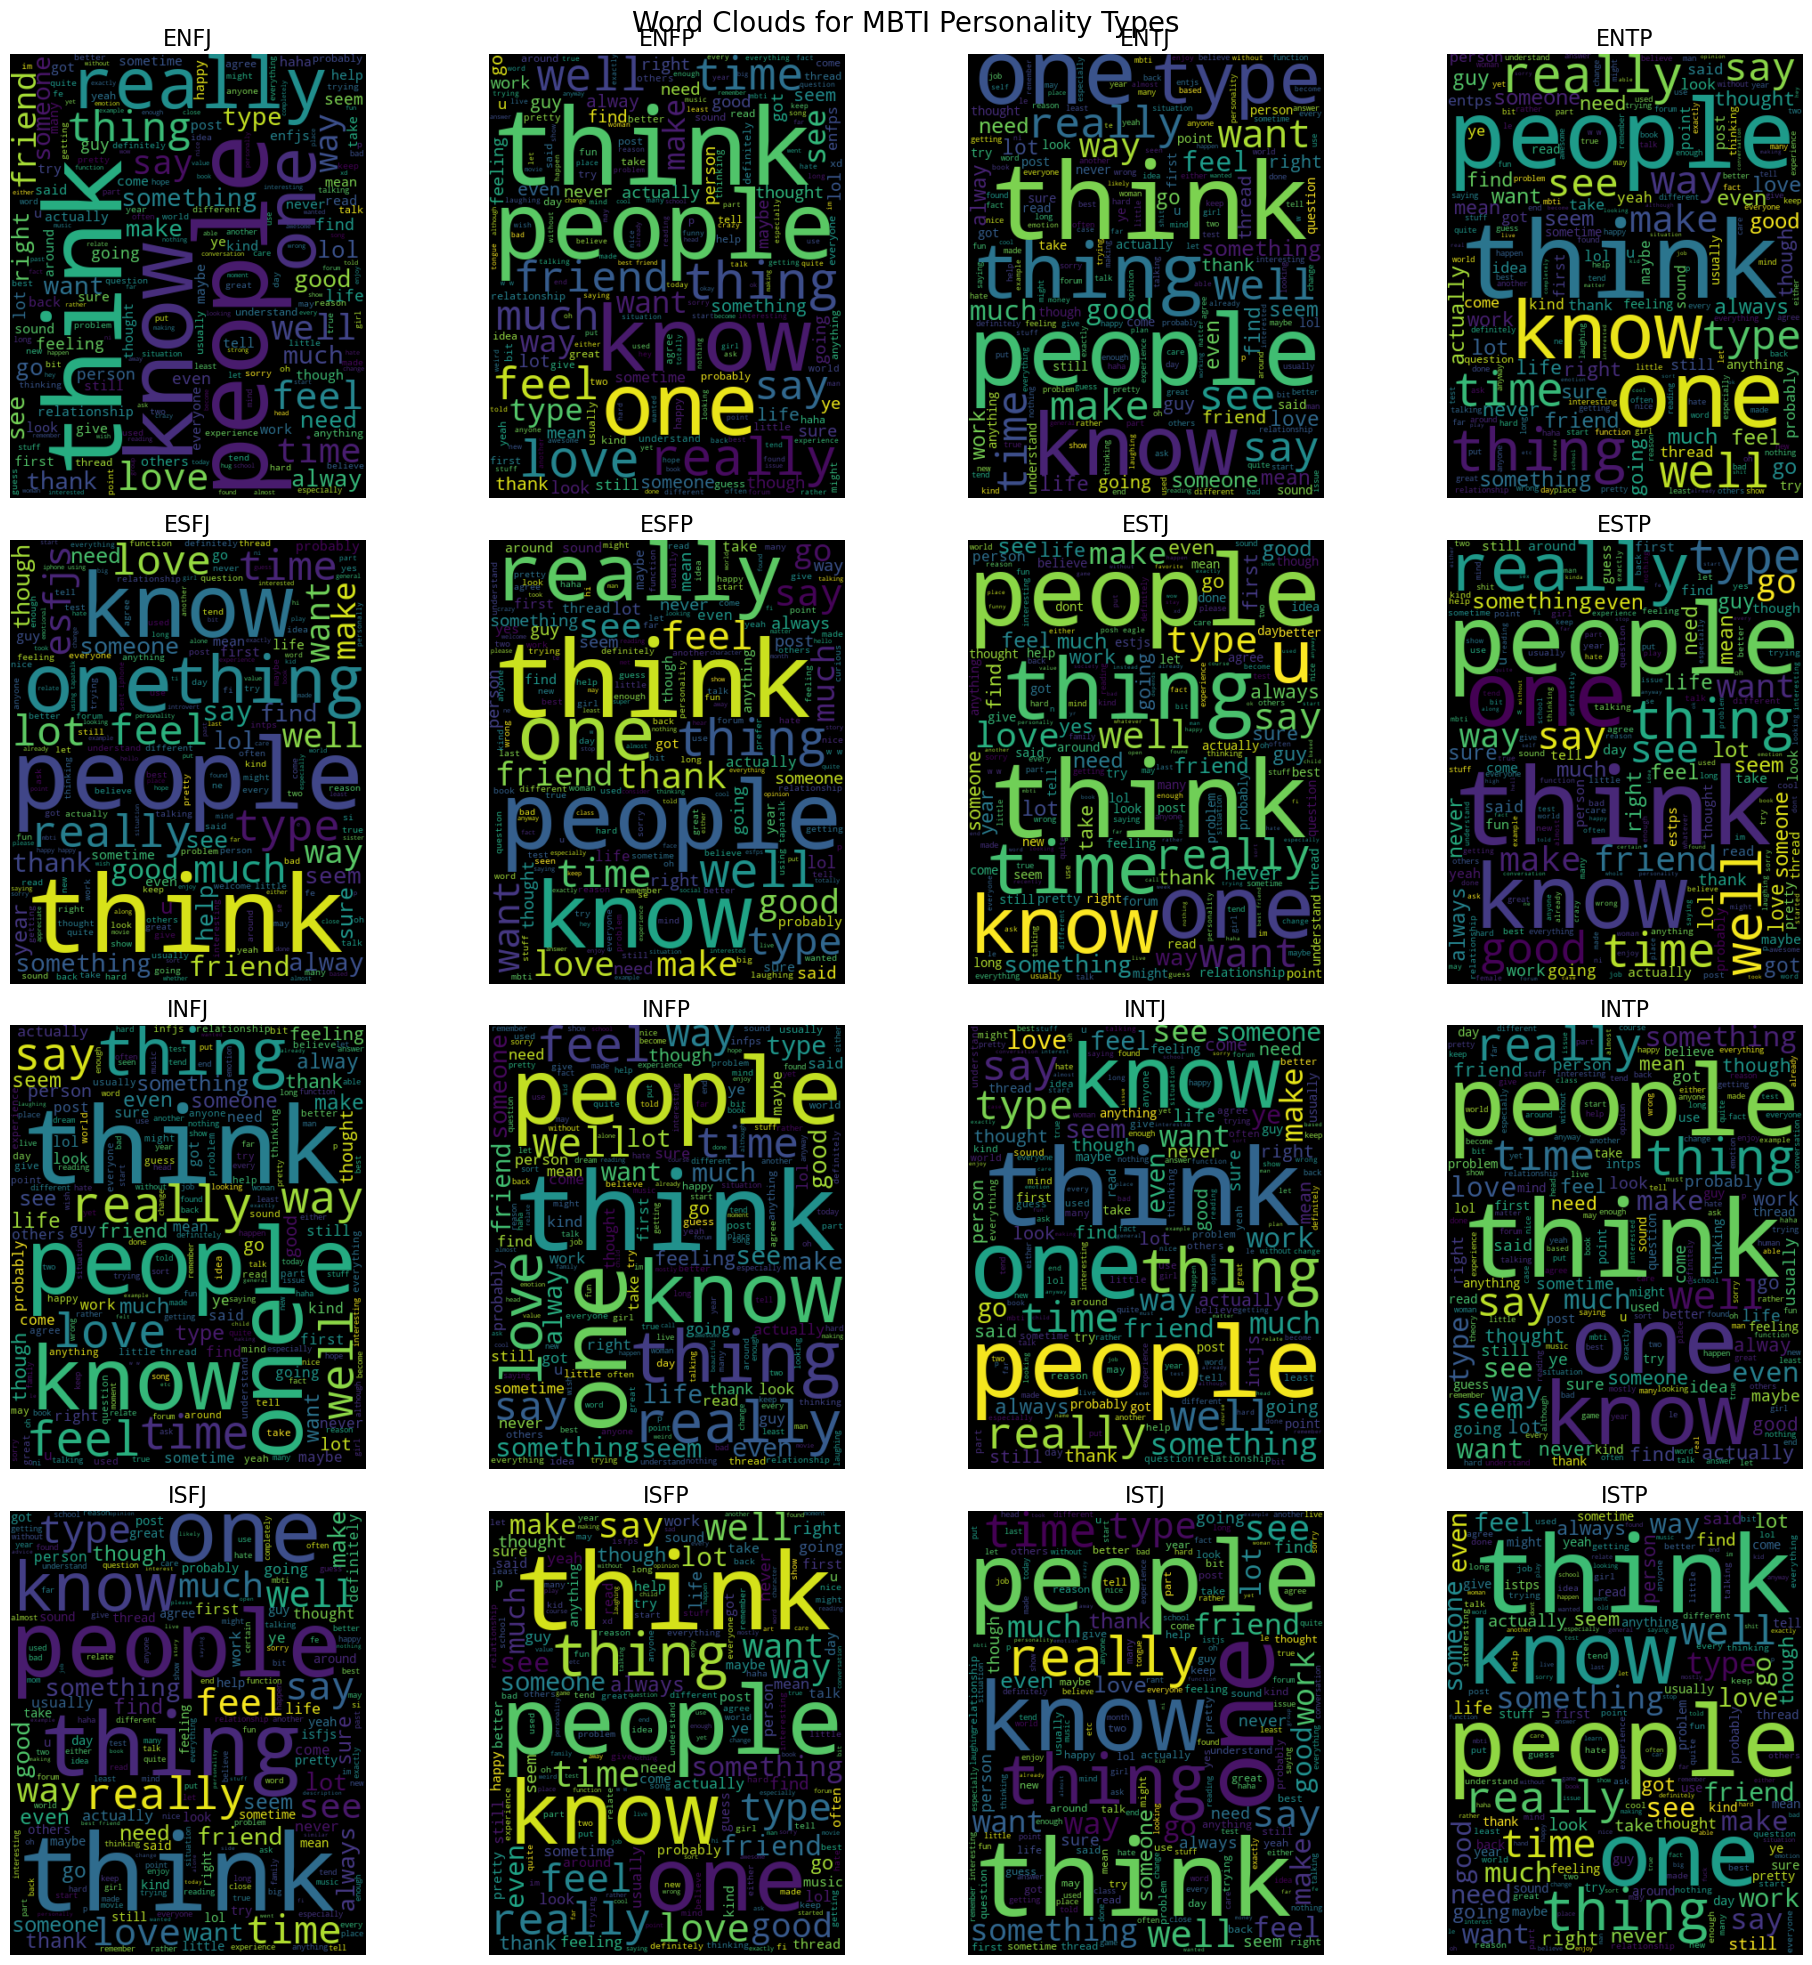

In [39]:
# !pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

grouped_senti = senti.groupby('type')

fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
ax = ax.flatten()

# wordcloud for each personality type
for i, (type_name, group) in enumerate(grouped_senti):
    wordcloud_words = ' '.join(group['text_tokens'])

    wordcloud = WordCloud(height=500).generate(wordcloud_words)

    ax[i].imshow(wordcloud, interpolation="bilinear")
    ax[i].axis("off")
    ax[i].set_title(type_name, fontdict={"fontsize": 16})

fig.suptitle("Word Clouds for MBTI Personality Types", fontsize=20)
plt.tight_layout()
plt.show()


In [40]:
senti.head()

type                                        text_tokens  Compound  \
0  INFJ  moment sportscenter top ten play prank life ch...     0.131   
1  ENTP  finding lack post alarming sex boring position...     0.119   
2  INTP  good one course say know blessing curse absolu...     0.116   
3  INTJ  dear enjoyed conversation day esoteric gabbing...     0.087   
4  ENTJ  fired another silly misconception approaching ...     0.186   

   Negative  Neutral  Positive  
0     0.598    0.270    0.9924  
1     0.598    0.284    0.9987  
2     0.581    0.303    0.9985  
3     0.661    0.252    0.9985  
4     0.538    0.276    0.9930

some words are common in all, removing them

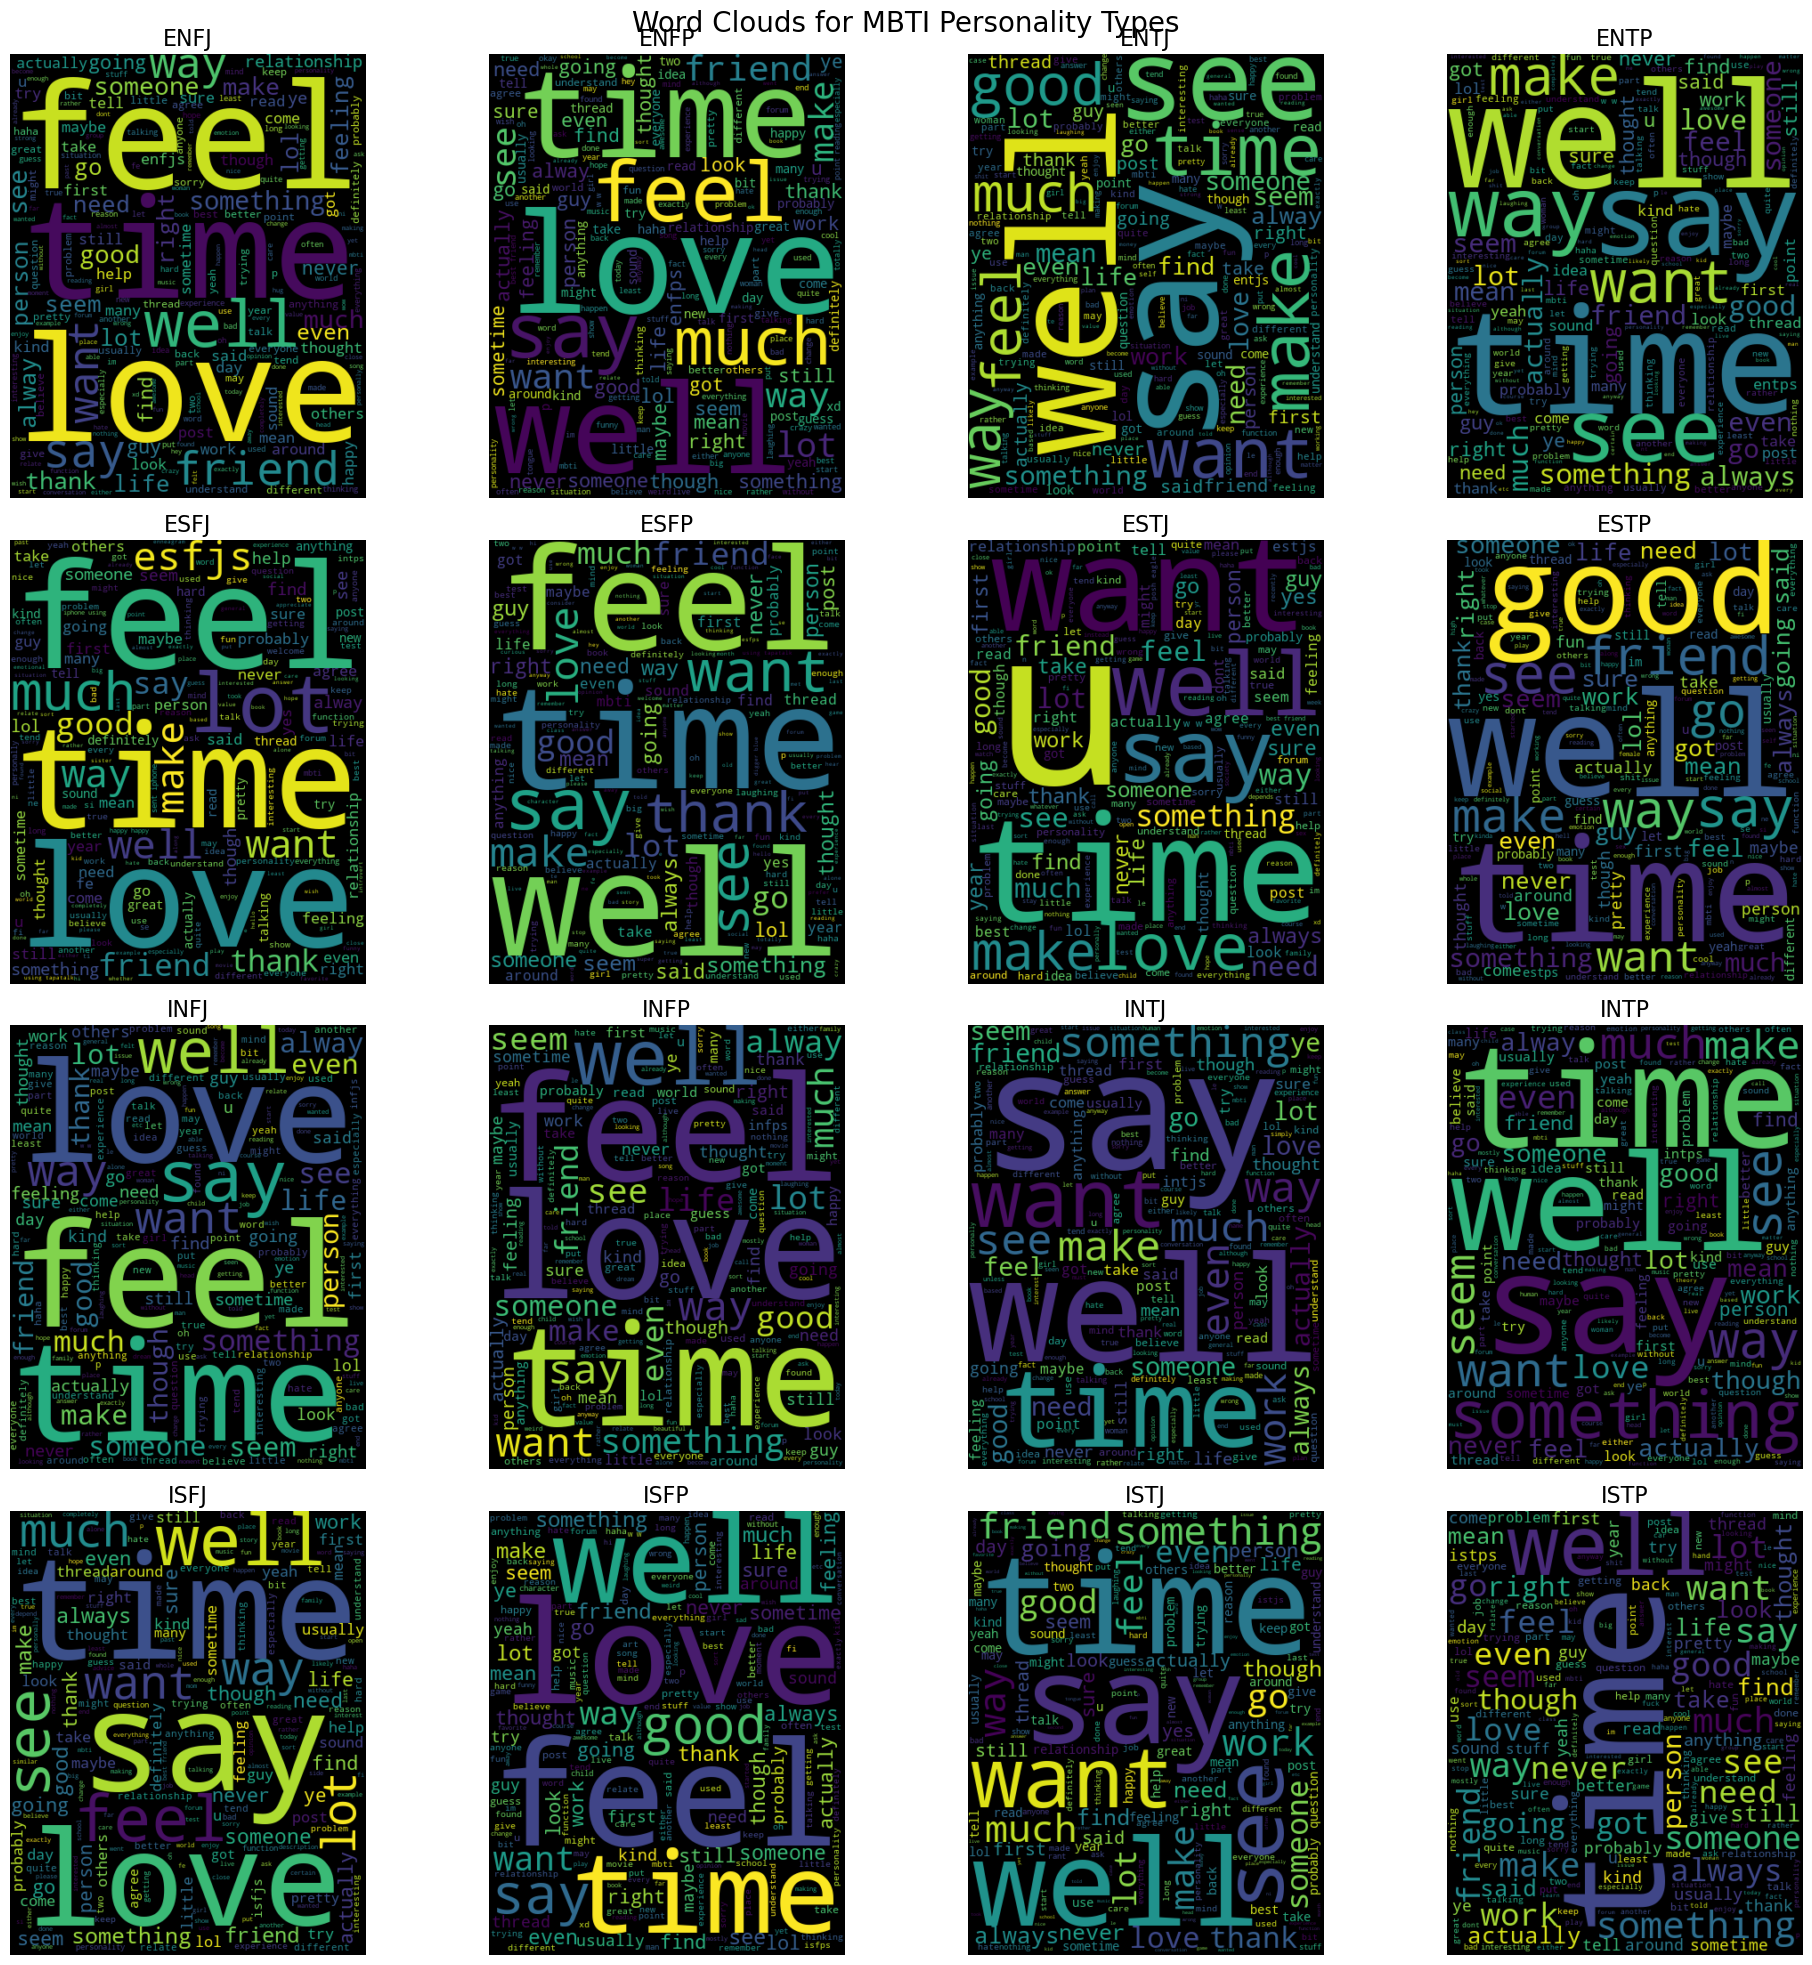

In [41]:
stop_words = ['people', 'think', 'one', 'thing', 'know', 'really','type']

def remove_stop_words(text_tokens):
    return ' '.join([word for word in text_tokens.split() if word.lower() not in stop_words])

senti['text_tokens'] = senti['text_tokens'].apply(remove_stop_words)

grouped_senti = senti.groupby('type')

fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
ax = ax.flatten()

# wordcloud for each personality type
for i, (type_name, group) in enumerate(grouped_senti):
    wordcloud_words = ' '.join(group['text_tokens'])

    wordcloud = WordCloud(height=500).generate(wordcloud_words)

    ax[i].imshow(wordcloud, interpolation="bilinear")
    ax[i].axis("off")
    ax[i].set_title(type_name, fontdict={"fontsize": 16})

fig.suptitle("Word Clouds for MBTI Personality Types", fontsize=20)
plt.tight_layout()
plt.show()


*Your comments here*

### Label


In [43]:

from collections import Counter
import string

nltk.download('averaged_perceptron_tagger')
new_data = data.copy()

new_data['E'] = new_data['type'].apply(lambda x: x.count('E'))
new_data['I'] = new_data['type'].apply(lambda x: x.count('I'))
new_data['S'] = new_data['type'].apply(lambda x: x.count('S'))
new_data['N'] = new_data['type'].apply(lambda x: x.count('N'))
new_data['F'] = new_data['type'].apply(lambda x: x.count('F'))
new_data['T'] = new_data['type'].apply(lambda x: x.count('T'))
new_data['P'] = new_data['type'].apply(lambda x: x.count('P'))
new_data['J'] = new_data['type'].apply(lambda x: x.count('J'))


new_data['word_count'] = new_data['posts'].apply(lambda x: len(x.split())/50.0)
new_data['images'] = new_data['posts'].apply(lambda x: x.count('jpg')/50.0)
new_data['variance_of_wordcount'] = new_data['posts'].apply(lambda x: np.var([len(i.split()) for i in x.split('|||')]))
new_data['interjections'] = new_data['posts'].apply(lambda x: sum(1 for word, tag in nltk.pos_tag(nltk.word_tokenize(x)) if tag == 'UH'))
new_data['interjections_per_comment'] = new_data['interjections']/50.0



# calculate the vocabulary richness
def vocabulary_richness(text):
    words = text.lower().translate(str.maketrans('', '', string.punctuation)).split()
    return len(set(words))/len(words)

new_data['nouns'] = new_data['posts'].apply(lambda x: sum(1 for word, tag in nltk.pos_tag(nltk.word_tokenize(x)) if tag.startswith('N')))
new_data['nouns_per_comment'] = new_data['nouns']/50.0

new_data['verbs'] = new_data['posts'].apply(lambda x: sum(1 for word, tag in nltk.pos_tag(nltk.word_tokenize(x)) if tag.startswith('V')))
new_data['verbs_per_comment'] = new_data['verbs']/50.0

new_data['adjectives'] = new_data['posts'].apply(lambda x: sum(1 for word, tag in nltk.pos_tag(nltk.word_tokenize(x)) if tag.startswith('J')))
new_data['adjectives_per_comment'] = new_data['adjectives']/50.0

new_data['vocabulary_richness'] = new_data['posts'].apply(vocabulary_richness)



[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\budhr\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [46]:
new_data = new_data.drop(columns = "interjections")

new_data['links_per_comment'] = new_data['posts'].apply(lambda x: x.count('http')/50.0)
new_data['question_marks'] = new_data['posts'].apply(lambda x: x.count('?')/50.0)
new_data['exclamations'] = new_data['posts'].apply(lambda x: x.count('!')/50.0)
new_data['ellipses'] = new_data['posts'].apply(lambda x: x.count('...')/50.0)



KeyError: "['interjections'] not found in axis"

In [54]:
new_data = new_data.drop(columns = "nouns")
new_data = new_data.drop(columns = "verbs")
new_data = new_data.drop(columns = "adjectives")


In [48]:
# new_data.head()
new_data = new_data.drop(columns = "post_token")
new_data.head()


type                                              posts  \
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...   
1  ENTP  'I'm finding the lack of me in these posts ver...   
2  INTP  'Good one  _____   https://www.youtube.com/wat...   
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...   
4  ENTJ  'You're fired.|||That's another silly misconce...   

                                         text_tokens  E  I  S  N  F  T  P  \
0  moment sportscenter top ten play prank life ch...  0  1  0  1  1  0  0   
1  finding lack post alarming sex boring position...  1  0  0  1  0  1  1   
2  good one course say know blessing curse absolu...  0  1  0  1  0  1  1   
3  dear enjoyed conversation day esoteric gabbing...  0  1  0  1  0  1  0   
4  fired another silly misconception approaching ...  1  0  0  1  0  1  0   

   ...  nouns_per_comment  verbs  verbs_per_comment  adjectives  \
0  ...               3.96     96               1.92          65   
1  ...               5.62    258               5.16          99   
2  ...               3.94    167               3.34          86   
3  ...               4.74    235               4.70          97   
4  ...               4.82    235               4.70          92   

   adjectives_per_comment  vocabulary_richness  links_per_comment  \
0                    1.30             0.636691               0.48   
1                    1.98             0.447595               0.20   
2                    1.72             0.533333               0.10   
3                    1.94             0.471308               0.04   
4                    1.84             0.490155               0.12   

   question_marks  exclamations  ellipses  
0            0.36          0.06      0.30  
1            0.10          0.00      0.38  
2            0.24          0.08      0.26  
3            0.22          0.06      0.52  
4            0.20          0.02      0.42  

[5 rows x 26 columns]

In [49]:
# from nltk.sentiment import SentimentIntensityAnalyzer

# sia = SentimentIntensityAnalyzer()

# for index, row in new_data.iterrows():
#   polarity = sia.polarity_scores(row['text_tokens'])['compound']
#   new_data.loc[index, 'sentiment'] = polarity
  
# new_data.head()
!pip install textblob
from textblob import TextBlob

for index, row in new_data.iterrows():
  new_data.loc[index,'sentiment'] = TextBlob(new_data.iloc[index]['text_tokens']).sentiment.polarity

new_data.head()

type                                              posts  \
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...   
1  ENTP  'I'm finding the lack of me in these posts ver...   
2  INTP  'Good one  _____   https://www.youtube.com/wat...   
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...   
4  ENTJ  'You're fired.|||That's another silly misconce...   

                                         text_tokens  E  I  S  N  F  T  P  \
0  moment sportscenter top ten play prank life ch...  0  1  0  1  1  0  0   
1  finding lack post alarming sex boring position...  1  0  0  1  0  1  1   
2  good one course say know blessing curse absolu...  0  1  0  1  0  1  1   
3  dear enjoyed conversation day esoteric gabbing...  0  1  0  1  0  1  0   
4  fired another silly misconception approaching ...  1  0  0  1  0  1  0   

   ...  verbs  verbs_per_comment  adjectives  adjectives_per_comment  \
0  ...     96               1.92          65                    1.30   
1  ...    258               5.16          99                    1.98   
2  ...    167               3.34          86                    1.72   
3  ...    235               4.70          97                    1.94   
4  ...    235               4.70          92                    1.84   

   vocabulary_richness  links_per_comment  question_marks  exclamations  \
0             0.636691               0.48            0.36          0.06   
1             0.447595               0.20            0.10          0.00   
2             0.533333               0.10            0.24          0.08   
3             0.471308               0.04            0.22          0.06   
4             0.490155               0.12            0.20          0.02   

   ellipses  sentiment  
0      0.30   0.118555  
1      0.38   0.099798  
2      0.26   0.160514  
3      0.52   0.120869  
4      0.42   0.048725  

[5 rows x 27 columns]

*Your comments here*

# 3. 

### 3.1


<Figure size 1500x1000 with 0 Axes>

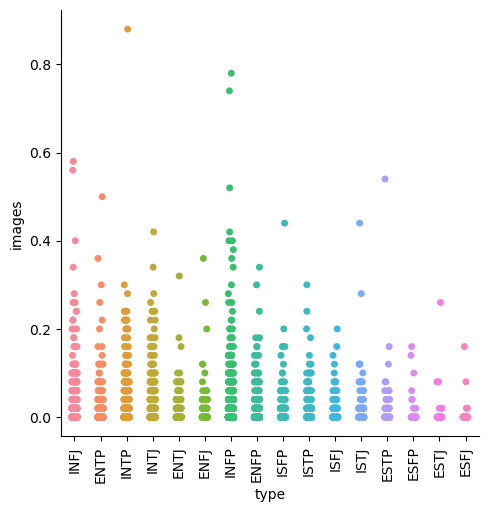

In [50]:
# word count by type
plt.figure(figsize=(15,10))
ax = sns.catplot(x="type", y="images", data=new_data)
ax.set_xticklabels(rotation=90)
plt.show()


<AxesSubplot:xlabel='type', ylabel='word_count'>

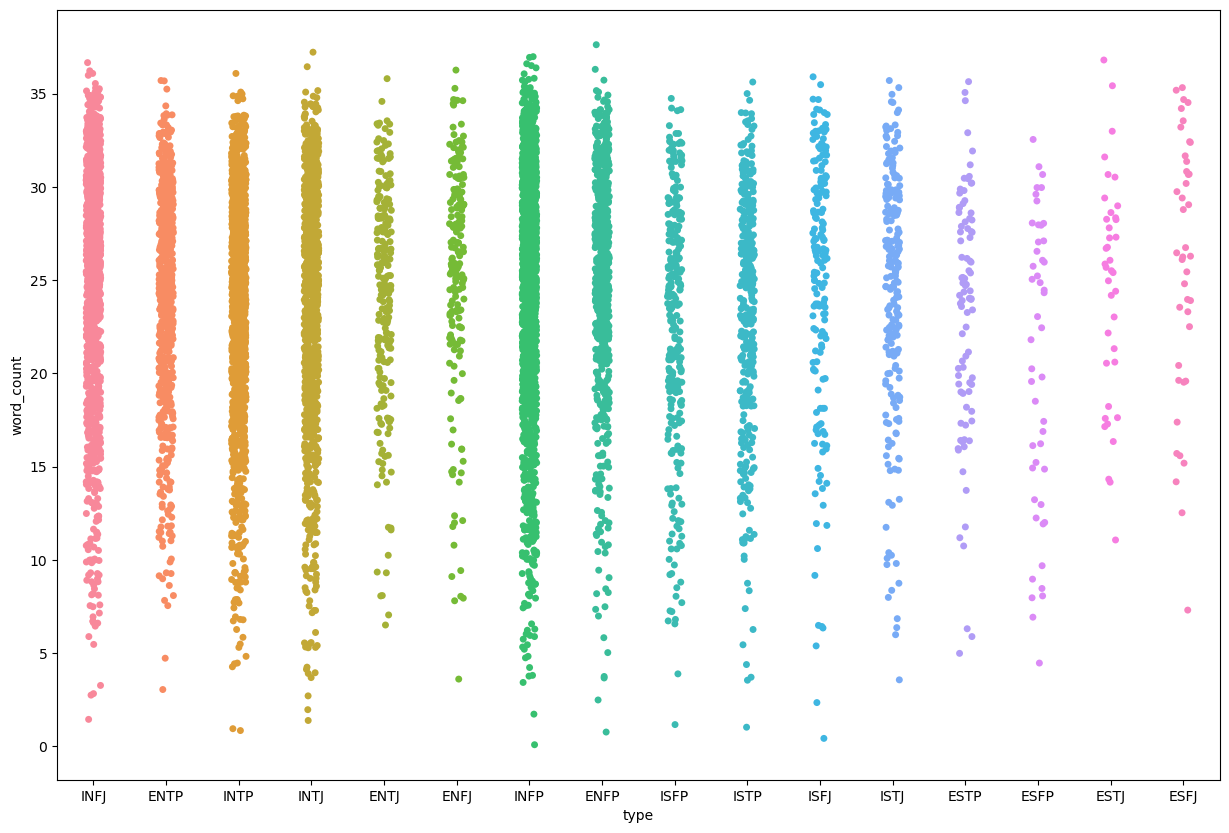

In [51]:
plt.figure(figsize=(15,10))
sns.stripplot(x="type",y= "word_count", data=new_data)


In [33]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# sentiment_count = new_data.groupby(['type', 'sentiment']).size().reset_index(name='count')

# sentiment_pivot = sentiment_count.pivot(index='type', columns='sentiment', values='count').fillna(0)

# sentiment_pivot.plot(kind='bar', stacked=True)

# plt.title('Sentiment Distribution by Personality Type')
# plt.xlabel('Personality Type')
# plt.ylabel('Count')

# plt.show()


*Your comments here*

### 3.2 correlation, feature importance

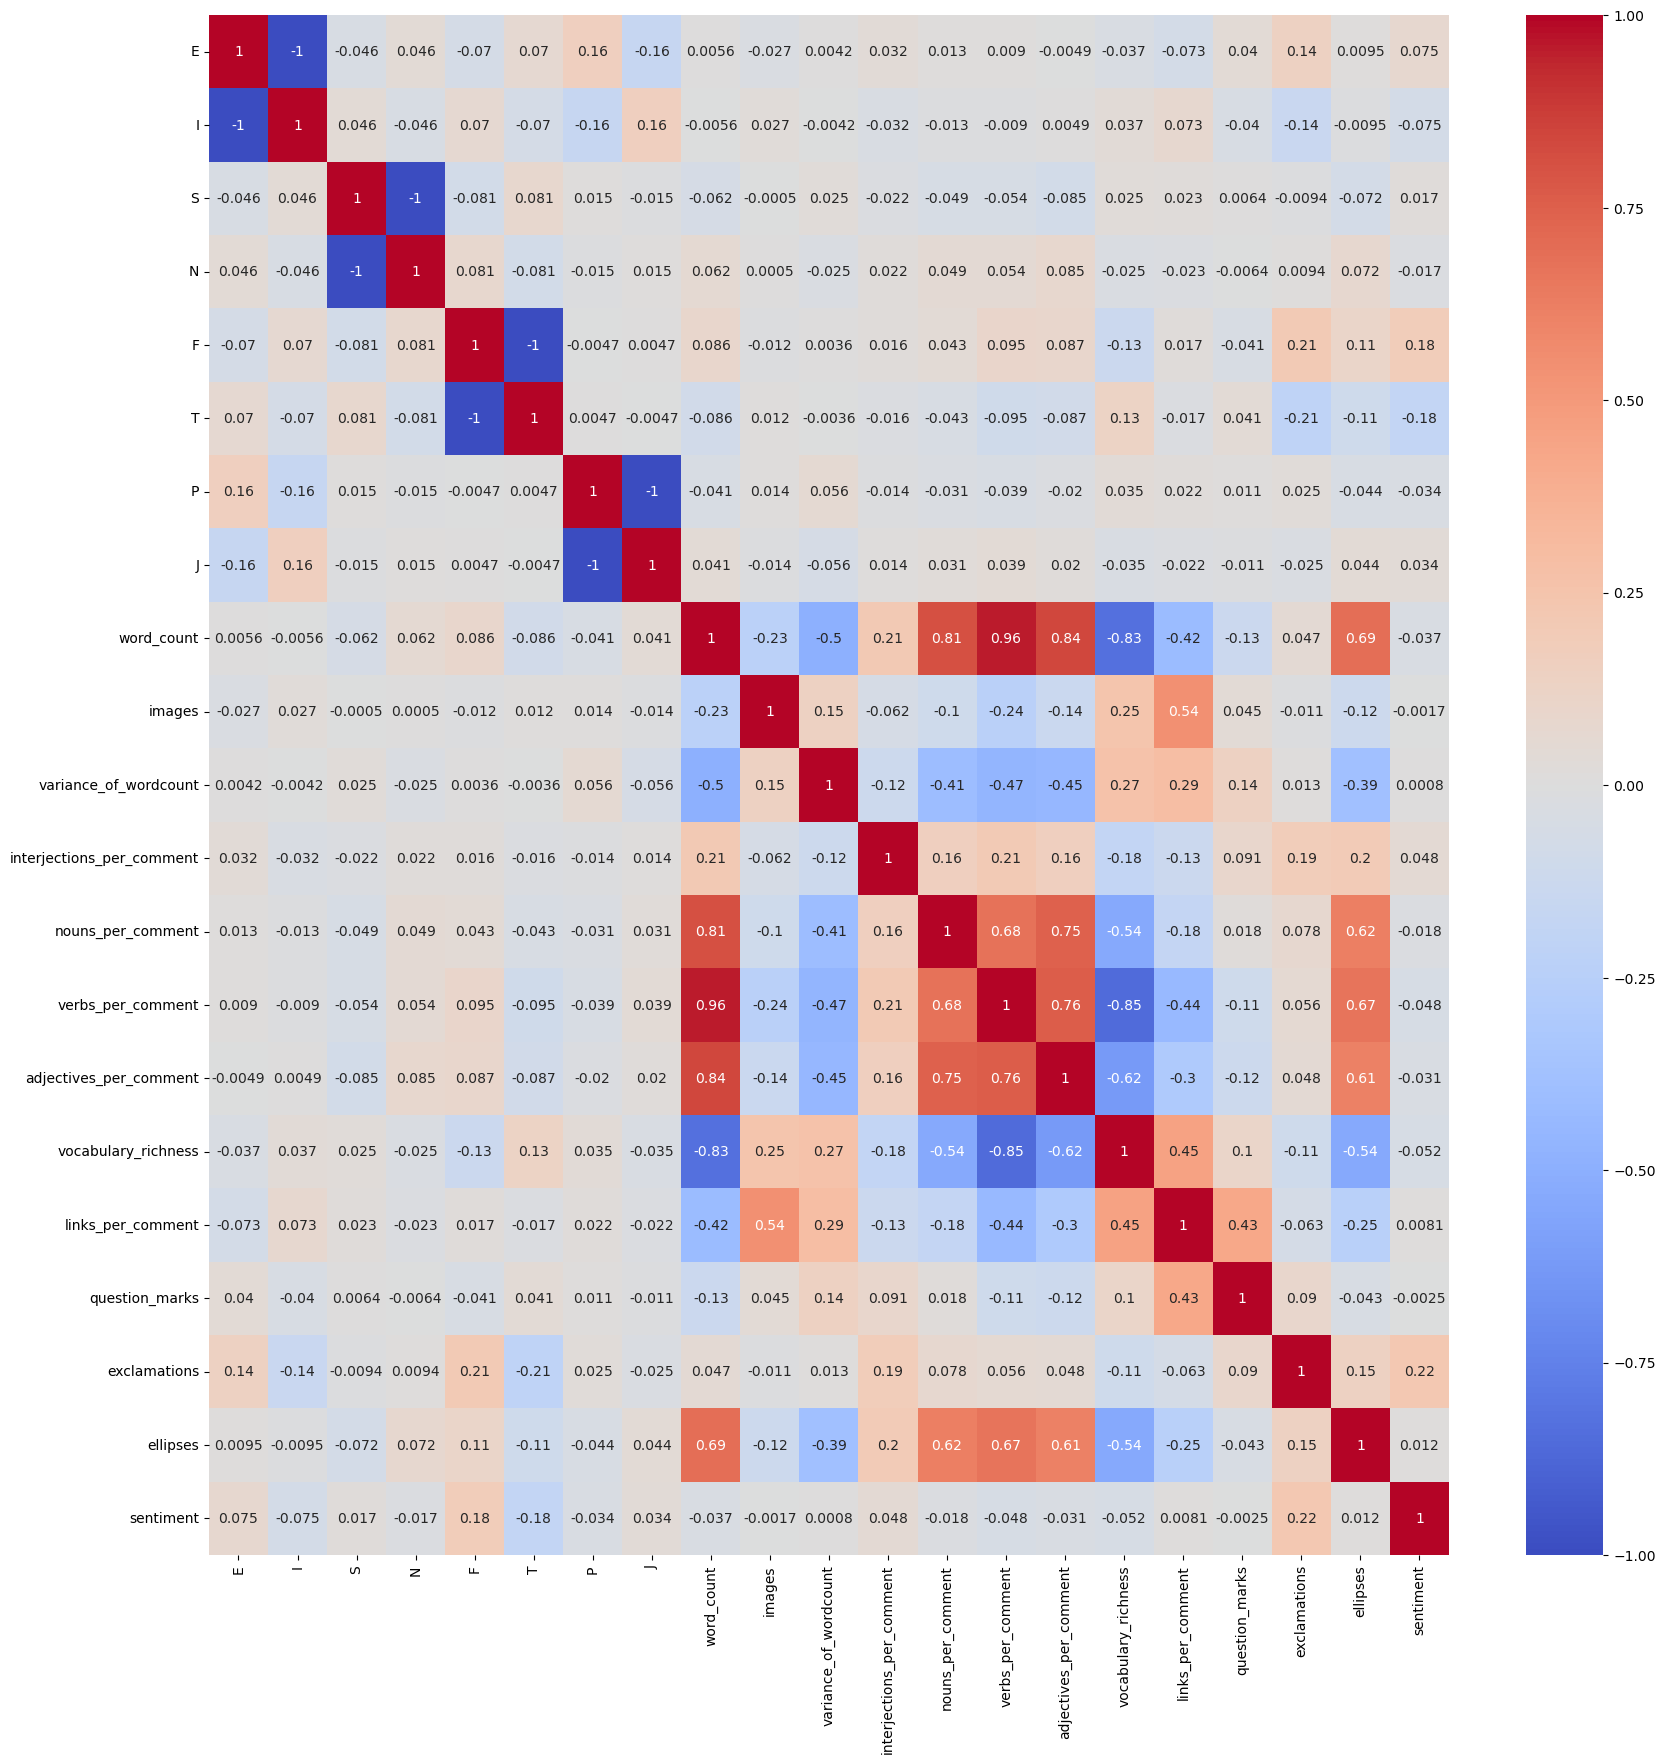

In [55]:

corr_matrix = new_data.corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


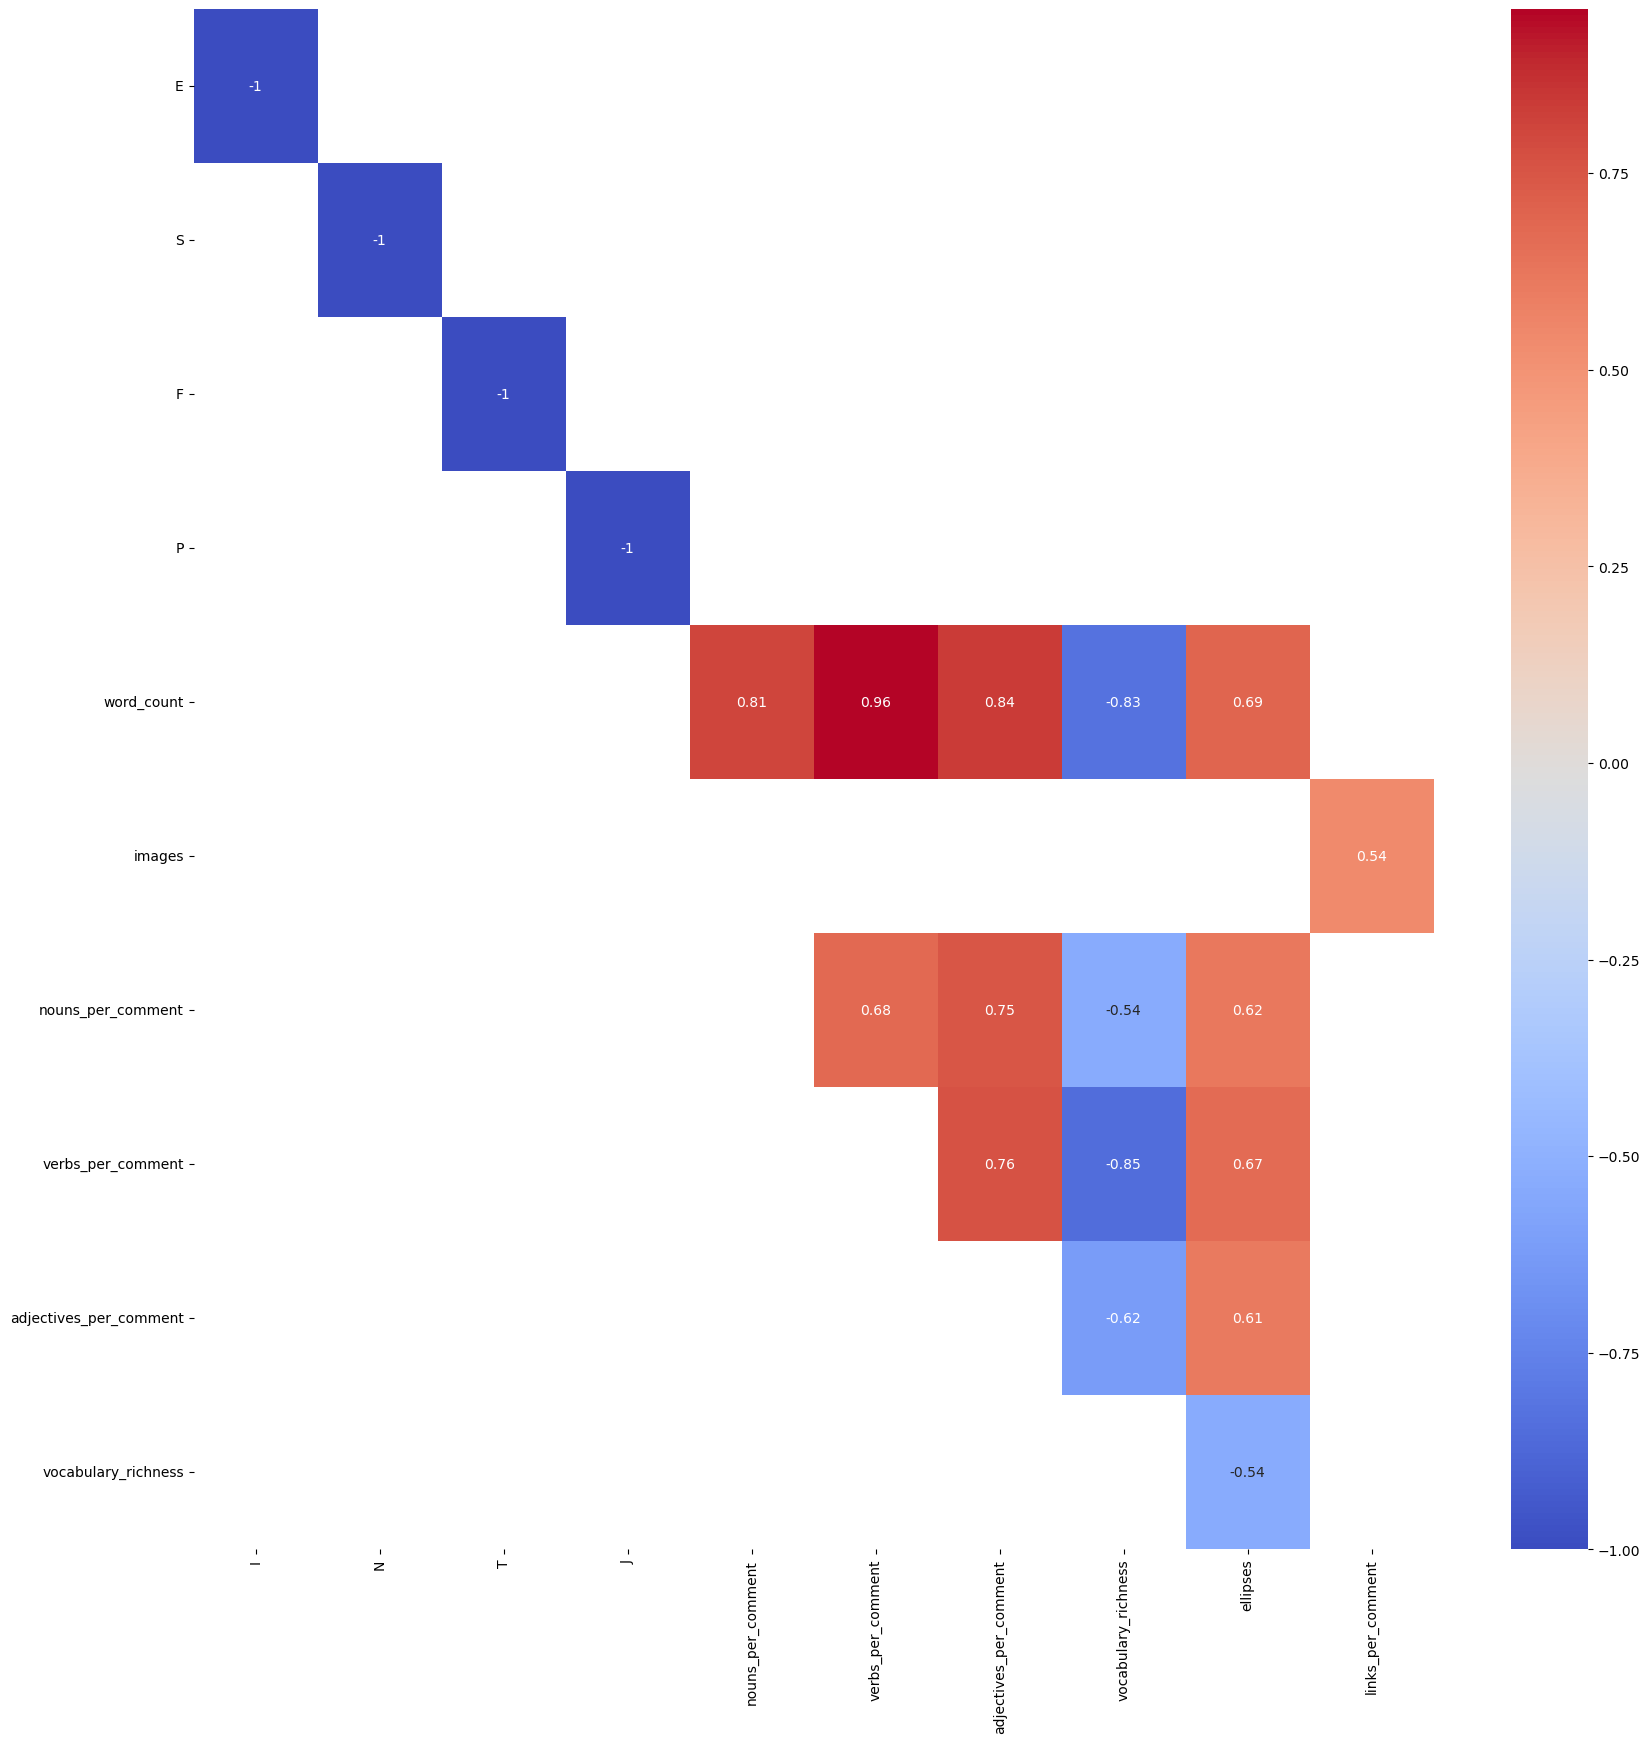

In [64]:
threshold = 0.5
corr_matrix = new_data.corr()

corr_filtered = pd.DataFrame()
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i,j]) > threshold:
            corr_filtered.loc[corr_matrix.columns[i],corr_matrix.columns[j]] = corr_matrix.iloc[i,j]

plt.figure(figsize=(20,20))
sns.heatmap(corr_filtered, annot=True, cmap='coolwarm')
plt.show()


In [189]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, make_scorer



def baseline(model, X_train, X_test, y_train, y_test, name):
    model.fit(X_train, y_train)
    
    # calculate evaluation metrics using cross-validation on the training data
    strat_k_fold = StratifiedKFold(n_splits=5, shuffle=True)
    accuracy = cross_val_score(model, X_train, y_train, cv=strat_k_fold, scoring='accuracy').mean()
#     precision = cross_val_score(model, X_train, y_train, cv=strat_k_fold, scoring='precision_weighted').mean()

#     recall = cross_val_score(model, X_train, y_train, cv=strat_k_fold, scoring='recall_weighted').mean()
    precision = np.mean(cross_val_score(model, X_train, y_train, cv=strat_k_fold, scoring=make_scorer(precision_score, zero_division=1, average='weighted')))
    recall = np.mean(cross_val_score(model, X_train, y_train, cv=strat_k_fold, scoring=make_scorer(recall_score, zero_division=1, average='weighted')))

    f1score = cross_val_score(model, X_train, y_train, cv=strat_k_fold, scoring='f1_weighted').mean()

    # predict the target variable using the trained model on the testing data
    y_pred = model.predict(X_test)


    conf_mat = confusion_matrix(y_test, y_pred)
    tn = conf_mat[0, 0]
    fp = conf_mat[0, 1]
    fn = conf_mat[1, 0]
    tp = conf_mat[1, 1]

#     specificity = tn / (tn + fp)

    # create a pandas dataframe with the evaluation metrics
    df_model = pd.DataFrame({
        'model': [name],
        'accuracy': [accuracy],
        'precision': [precision],
        'recall': [recall],
        'f1score': [f1score],
    })

    return df_model


In [190]:
from sklearn.preprocessing import StandardScaler
X = new_data[['word_count', 'images', 'variance_of_wordcount','nouns_per_comment','verbs_per_comment','adjectives_per_comment',
              'vocabulary_richness', 'interjections_per_comment', 'links_per_comment', 'question_marks',
       'exclamations', 'ellipses', 'sentiment']]

y = new_data['type']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42, test_size=0.2)


# print(X.head())
# print(y.head())

y.head()

0    INFJ
1    ENTP
2    INTP
3    INTJ
4    ENTJ
Name: type, dtype: object

*Your comments here*

### 3.3 Random forest for feature importance

In [65]:
new_data.head()

type                                              posts  \
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...   
1  ENTP  'I'm finding the lack of me in these posts ver...   
2  INTP  'Good one  _____   https://www.youtube.com/wat...   
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...   
4  ENTJ  'You're fired.|||That's another silly misconce...   

                                         text_tokens  E  I  S  N  F  T  P  \
0  moment sportscenter top ten play prank life ch...  0  1  0  1  1  0  0   
1  finding lack post alarming sex boring position...  1  0  0  1  0  1  1   
2  good one course say know blessing curse absolu...  0  1  0  1  0  1  1   
3  dear enjoyed conversation day esoteric gabbing...  0  1  0  1  0  1  0   
4  fired another silly misconception approaching ...  1  0  0  1  0  1  0   

   ...  interjections_per_comment  nouns_per_comment  verbs_per_comment  \
0  ...                       0.00               3.96               1.92   
1  ...                       0.00               5.62               5.16   
2  ...                       0.04               3.94               3.34   
3  ...                       0.00               4.74               4.70   
4  ...                       0.04               4.82               4.70   

   adjectives_per_comment  vocabulary_richness  links_per_comment  \
0                    1.30             0.636691               0.48   
1                    1.98             0.447595               0.20   
2                    1.72             0.533333               0.10   
3                    1.94             0.471308               0.04   
4                    1.84             0.490155               0.12   

   question_marks  exclamations  ellipses  sentiment  
0            0.36          0.06      0.30   0.118555  
1            0.10          0.00      0.38   0.099798  
2            0.24          0.08      0.26   0.160514  
3            0.22          0.06      0.52   0.120869  
4            0.20          0.02      0.42   0.048725  

[5 rows x 24 columns]

In [210]:
from sklearn.ensemble import RandomForestClassifier


final_data = new_data.copy()


X = final_data.drop(['type','posts','text_tokens','TT','JJ','EE','SS','E','I','N','S','J','P','F','T'], axis=1)
y = final_data['type']

X.head()
y.head()

0    INFJ
1    ENTP
2    INTP
3    INTJ
4    ENTJ
Name: type, dtype: object

In [211]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X, y)

importance = rfc.feature_importances_
sorted_idx = importance.argsort()[::-1]
features = X.columns
for i in sorted_idx:
    print("{}: {:.3f}".format(X.columns[i], importance[i]))


sentiment: 0.101
variance_of_wordcount: 0.097
vocabulary_richness: 0.096
nouns_per_comment: 0.089
word_count: 0.088
verbs_per_comment: 0.087
adjectives_per_comment: 0.087
ellipses: 0.080
question_marks: 0.076
exclamations: 0.074
links_per_comment: 0.050
interjections_per_comment: 0.048
images: 0.025


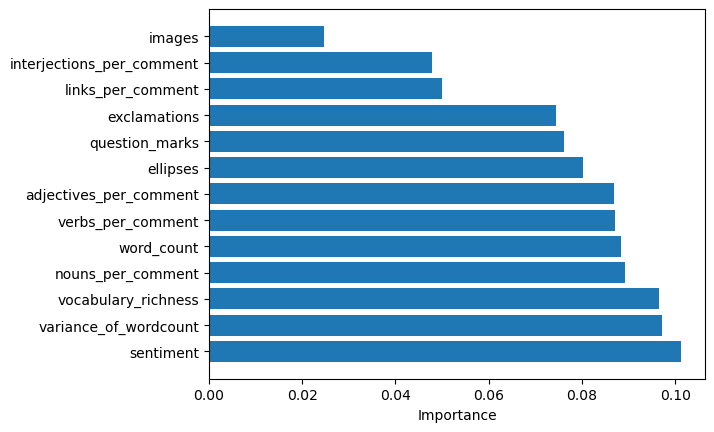

In [212]:
import matplotlib.pyplot as plt

plt.barh(range(len(sorted_idx)), importance[sorted_idx])
plt.yticks(range(len(sorted_idx)), [features[i] for i in sorted_idx])
plt.xlabel('Importance')
plt.show()


In [216]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Create a PCA object
pca = PCA()

# Fit and transform the data
X_pca = pca.fit_transform(X_std)

# Get the importance of each principal component
pca_importance = pca.explained_variance_ratio_

# Get the names of the original features
feature_names = list(X.columns)

# Get the names of the principal components
component_names = [f"PC{i+1}" for i in range(len(pca_importance))]

# Create a dictionary mapping the names of the principal components to their importance scores
pca_importance_dict = dict(zip(component_names, pca_importance))

# Sort the dictionary by importance score (in descending order)
sorted_pca_importance = sorted(pca_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print the names and importance scores of the principal components
print("PCA component importance:")
for component, importance in sorted_pca_importance:
    print(f"{component}: {importance:.3f}")

# Get the importance of the original features by looking at their loadings onto each principal component
feature_importance = abs(pca.components_)
feature_importance /= feature_importance.sum(axis=1, keepdims=True)

# Create a dictionary mapping the names of the original features to their importance scores
feature_importance_dict = dict(zip(feature_names, feature_importance))

# Sort the dictionary by importance score (in descending order)
# sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1].any(), reverse=True)
# Sort the dictionary by importance score (in descending order)
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1].all(), reverse=True)

# Print the names and importance scores of the original features
print("\nOriginal feature importance:")
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance[0]:.3f}")


PCA component importance:
PC1: 0.404
PC2: 0.118
PC3: 0.102
PC4: 0.077
PC5: 0.066
PC6: 0.061
PC7: 0.056
PC8: 0.036
PC9: 0.032
PC10: 0.021
PC11: 0.018
PC12: 0.008
PC13: 0.001

Original feature importance:
word_count: 0.137
images: 0.022
variance_of_wordcount: 0.031
interjections_per_comment: 0.003
nouns_per_comment: 0.021
verbs_per_comment: 0.023
adjectives_per_comment: 0.030
vocabulary_richness: 0.027
links_per_comment: 0.039
question_marks: 0.025
exclamations: 0.049
ellipses: 0.131
sentiment: 0.456


*Your comments here*

### 3.4 
Logistic Regression


In [79]:
for i, letter in enumerate("ESTJ"):
    new_data[f"{letter+letter}"] = new_data["type"].apply(lambda x: int(x[i] == letter))

In [80]:
new_data.head()
# new_data.columns

type                                              posts  \
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...   
1  ENTP  'I'm finding the lack of me in these posts ver...   
2  INTP  'Good one  _____   https://www.youtube.com/wat...   
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...   
4  ENTJ  'You're fired.|||That's another silly misconce...   

                                         text_tokens  E  I  S  N  F  T  P  \
0  moment sportscenter top ten play prank life ch...  0  1  0  1  1  0  0   
1  finding lack post alarming sex boring position...  1  0  0  1  0  1  1   
2  good one course say know blessing curse absolu...  0  1  0  1  0  1  1   
3  dear enjoyed conversation day esoteric gabbing...  0  1  0  1  0  1  0   
4  fired another silly misconception approaching ...  1  0  0  1  0  1  0   

   ...  vocabulary_richness  links_per_comment  question_marks  exclamations  \
0  ...             0.636691               0.48            0.36          0.06   
1  ...             0.447595               0.20            0.10          0.00   
2  ...             0.533333               0.10            0.24          0.08   
3  ...             0.471308               0.04            0.22          0.06   
4  ...             0.490155               0.12            0.20          0.02   

   ellipses  sentiment  EE  SS  TT  JJ  
0      0.30   0.118555   0   0   0   1  
1      0.38   0.099798   1   0   1   0  
2      0.26   0.160514   0   0   1   0  
3      0.52   0.120869   0   0   1   1  
4      0.42   0.048725   1   0   1   1  

[5 rows x 28 columns]

In [232]:
X = new_data[['text_tokens', 'word_count', 'images', 'variance_of_wordcount',
       'interjections_per_comment', 'nouns_per_comment','verbs_per_comment','adjectives_per_comment',
              'vocabulary_richness', 'links_per_comment', 'question_marks',
       'exclamations', 'ellipses', 'sentiment']]

y = new_data.iloc[:, 24:28]

print(X.head())
print(y.head())

                                         text_tokens  word_count  images  \
0  moment sportscenter top ten play prank life ch...       11.12    0.12   
1  finding lack post alarming sex boring position...       23.40    0.02   
2  good one course say know blessing curse absolu...       16.72    0.00   
3  dear enjoyed conversation day esoteric gabbing...       21.28    0.00   
4  fired another silly misconception approaching ...       19.34    0.04   

   variance_of_wordcount  interjections_per_comment  nouns_per_comment  \
0               135.2900                       0.00               3.96   
1               187.4756                       0.00               5.62   
2               180.6900                       0.04               3.94   
3               181.8324                       0.00               4.74   
4               196.4576                       0.04               4.82   

   verbs_per_comment  adjectives_per_comment  vocabulary_richness  \
0               1.92         

In [233]:

mbti_type = {
    "EE": "Extrovert-Introvert",
    "SS": "Sensing-Intuition",
    "TT": "Thinking-Feeling",
    "JJ": "Judging-Perceiving",
}

additional_stopwords = ['ni','estps', 'entps', 'hsp', 'esfjs', 'intjs', 'se', 'perc', 'hitler', 'nt', 'infjs', 'enfps', 'isfjs', 'sx', 'nf', 'sp', 'type', 'ha', 'fi', 'intps', 'lol', 'yo', 'hahaha', 'istps', 'si', 'estjs', 'sj', 'mbti', 'isfps', 'entjs', 'enfjs', 'ne', 'infps', 'fe', 'anime', 'ti', 'istjs', 'jawz', 'hey', 'hello']

# tfidf_vectorizer = TfidfVectorizer(min_df=25, max_df=0.85, stop_words=additional_stopwords)

In [234]:
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest

scores = ['word_count', 'images', 'variance_of_wordcount','nouns_per_comment','verbs_per_comment','adjectives_per_comment',
              'vocabulary_richness', 'interjections_per_comment', 'links_per_comment', 'question_marks',
       'exclamations', 'ellipses', 'sentiment']


best_k_features = make_pipeline(MinMaxScaler(), SelectKBest(f_classif))


# Set up preprocessing for TF-IDF vectorizer
preprocessor = ColumnTransformer(
    transformers=[
        (
            "tfidf",
            TfidfVectorizer(stop_words=additional_stopwords),
            "text_tokens",
        ),
        ("selectbest", best_k_features, scores),
    ],
    remainder="passthrough",
)


In [235]:
X_tfidf = new_data[['text_tokens', 'word_count', 'images', 'variance_of_wordcount','nouns_per_comment','verbs_per_comment','adjectives_per_comment',
              'vocabulary_richness', 'interjections_per_comment', 'links_per_comment', 'question_marks',
       'exclamations', 'ellipses', 'sentiment']]

y_tfidf = new_data.iloc[:, 24:28]

print(X_tfidf.head())
print(y_tfidf.head())

                                         text_tokens  word_count  images  \
0  moment sportscenter top ten play prank life ch...       11.12    0.12   
1  finding lack post alarming sex boring position...       23.40    0.02   
2  good one course say know blessing curse absolu...       16.72    0.00   
3  dear enjoyed conversation day esoteric gabbing...       21.28    0.00   
4  fired another silly misconception approaching ...       19.34    0.04   

   variance_of_wordcount  nouns_per_comment  verbs_per_comment  \
0               135.2900               3.96               1.92   
1               187.4756               5.62               5.16   
2               180.6900               3.94               3.34   
3               181.8324               4.74               4.70   
4               196.4576               4.82               4.70   

   adjectives_per_comment  vocabulary_richness  interjections_per_comment  \
0                    1.30             0.636691                       

# geometric_mean_score


In [187]:
from sklearn.naive_bayes import MultinomialNB
nb = imb_make_pipeline(preprocessor, RandomUnderSampler(), MultinomialNB(),)
model(nb)

Extrovert-Introvert
Train accuracy: 0.861671469740634
Test accuracy: 0.7314121037463976
Geometric Mean Score: 0.68
ROC-AUC Score: 0.76
Average Precision-Recall Score: 0.47
                   pre       rec       spe        f1       geo       iba       sup

          0       0.87      0.77      0.60      0.82      0.68      0.47      1335
          1       0.44      0.60      0.77      0.51      0.68      0.45       400

avg / total       0.77      0.73      0.64      0.74      0.68      0.47      1735

Sensing-Intuition
Train accuracy: 0.9353025936599424
Test accuracy: 0.8443804034582133
Geometric Mean Score: 0.56
ROC-AUC Score: 0.76
Average Precision-Recall Score: 0.34
                   pre       rec       spe        f1       geo       iba       sup

          0       0.89      0.93      0.28      0.91      0.51      0.28      1496
          1       0.41      0.28      0.93      0.33      0.51      0.24       239

avg / total       0.82      0.84      0.37      0.83      0.51      0.2

In [179]:
from sklearn.metrics import average_precision_score, roc_auc_score
from imblearn.metrics import geometric_mean_score, classification_report_imbalanced
from sklearn.model_selection import train_test_split

def model(ml_model):
    for col in y_tfidf.columns:
        print(mbti_type[col])
        target_col = y_tfidf[col]

        X_train, X_test, y_train, y_test = train_test_split(
            X_tfidf, target_col, test_size=0.2, random_state=42, stratify=target_col
        )

        y_train.head()
        # model training
        ml_model.fit(X_train, y_train)
        
        train_acc = ml_model.score(X_train, y_train)
        print('Train accuracy: {}'.format(train_acc))

        test_acc = ml_model.score(X_test, y_test)
        print('Test accuracy: {}'.format(test_acc))

        y_pred = ml_model.predict(X_test)

        y_proba = ml_model.predict_proba(X_test)[:, 1]

        # precision recall score
        average_precision = average_precision_score(y_test, y_proba)

        # model evaluation
        print(f"Geometric Mean Score: {geometric_mean_score(y_test, y_pred, average='weighted'):.2f}")
        print(f"ROC-AUC Score: {roc_auc_score(y_test, y_proba):.2f}")
        print(f"Average Precision-Recall Score: {average_precision:.2f}")
        print(classification_report_imbalanced(y_test, y_pred))

In [180]:
# !pip install imblearn
from imblearn.pipeline import make_pipeline as imb_make_pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression

tfidf_logistic_regression = imb_make_pipeline(preprocessor, RandomUnderSampler(), LogisticRegression())
model(tfidf_logistic_regression)

Extrovert-Introvert
Train accuracy: 0.7912103746397694
Test accuracy: 0.6881844380403458
Geometric Mean Score: 0.69
ROC-AUC Score: 0.76
Average Precision-Recall Score: 0.48
                   pre       rec       spe        f1       geo       iba       sup

          0       0.88      0.69      0.69      0.77      0.69      0.48      1335
          1       0.40      0.69      0.69      0.51      0.69      0.48       400

avg / total       0.77      0.69      0.69      0.71      0.69      0.48      1735

Sensing-Intuition
Train accuracy: 0.7760806916426513
Test accuracy: 0.693371757925072
Geometric Mean Score: 0.66
ROC-AUC Score: 0.74
Average Precision-Recall Score: 0.34
                   pre       rec       spe        f1       geo       iba       sup

          0       0.92      0.70      0.62      0.80      0.66      0.44      1496
          1       0.25      0.62      0.70      0.36      0.66      0.44       239

avg / total       0.83      0.69      0.63      0.74      0.66      0.4

In [225]:
# !pip install imblearn
from imblearn.pipeline import make_pipeline as imb_make_pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegressionCV

tfidf_logistic_regression = imb_make_pipeline(preprocessor, RandomUnderSampler(), LogisticRegressionCV(max_iter=1000))
model(tfidf_logistic_regression)

Extrovert-Introvert
Train accuracy: 0.8128242074927954
Test accuracy: 0.6910662824207493
Geometric Mean Score: 0.69
ROC-AUC Score: 0.76
Average Precision-Recall Score: 0.49
                   pre       rec       spe        f1       geo       iba       sup

          0       0.88      0.69      0.69      0.78      0.69      0.48      1335
          1       0.40      0.69      0.69      0.51      0.69      0.48       400

avg / total       0.77      0.69      0.69      0.71      0.69      0.48      1735

Sensing-Intuition
Train accuracy: 0.7773775216138329
Test accuracy: 0.6847262247838617
Geometric Mean Score: 0.68
ROC-AUC Score: 0.74
Average Precision-Recall Score: 0.35
                   pre       rec       spe        f1       geo       iba       sup

          0       0.93      0.69      0.68      0.79      0.68      0.47      1496
          1       0.26      0.68      0.69      0.37      0.68      0.46       239

avg / total       0.84      0.68      0.68      0.73      0.68      0.

Extrovert-Introvert: performance of the model is moderately good. However, there is still room for improvement.

Sensing-Intuition: Geometric Mean Score and ROC-AUC Score are both reasonable, indicating that the model is performing well in terms of distinguishing between the two personality traits. However, the Average Precision-Recall Score is quite low, which suggests that the model may have difficulty with identifying true positive results. This could be due to class imbalance.

Thinking-Feeling: The scores suggest that the model is performing well in terms of accurately predicting the target variable.

Judging-Perceiving: decent scores



## Model 2 : Lasso Regularization

In [183]:
tfidf_lasso = imb_make_pipeline(preprocessor, RandomUnderSampler(), LogisticRegressionCV(penalty='l1', solver='liblinear', max_iter=1000))
model(tfidf_lasso)


Extrovert-Introvert
Train accuracy: 0.7370317002881844
Test accuracy: 0.6634005763688761
Geometric Mean Score: 0.65
ROC-AUC Score: 0.71
Average Precision-Recall Score: 0.45
                   pre       rec       spe        f1       geo       iba       sup

          0       0.86      0.67      0.63      0.75      0.65      0.43      1335
          1       0.37      0.63      0.67      0.46      0.65      0.42       400

avg / total       0.75      0.66      0.64      0.69      0.65      0.43      1735

Sensing-Intuition
Train accuracy: 0.7763688760806916
Test accuracy: 0.6512968299711815
Geometric Mean Score: 0.62
ROC-AUC Score: 0.69
Average Precision-Recall Score: 0.27
                   pre       rec       spe        f1       geo       iba       sup

          0       0.91      0.66      0.58      0.77      0.62      0.39      1496
          1       0.21      0.58      0.66      0.31      0.62      0.38       239

avg / total       0.81      0.65      0.59      0.70      0.62      0.

In [125]:
# tfidf_lasso = imb_make_pipeline(preprocessor, RandomUnderSampler(), LogisticRegressionCV(penalty='l1', solver='saga', max_iter=1000, Cs=10))
# model(tfidf_lasso)


In [126]:
# tfidf_ridge = imb_make_pipeline(preprocessor, RandomUnderSampler(), LogisticRegressionCV(penalty='l2', solver='saga', max_iter=1000, Cs=10))
# model(tfidf_ridge)


## Ridge regularization

In [184]:
tfidf_ridge = imb_make_pipeline(preprocessor, RandomUnderSampler(), LogisticRegressionCV(penalty='l2', solver='liblinear', max_iter=1000))
model(tfidf_ridge)


Extrovert-Introvert
Train accuracy: 0.8220461095100865
Test accuracy: 0.6864553314121038
Geometric Mean Score: 0.68
ROC-AUC Score: 0.76
Average Precision-Recall Score: 0.49
                   pre       rec       spe        f1       geo       iba       sup

          0       0.88      0.69      0.68      0.77      0.68      0.47      1335
          1       0.40      0.68      0.69      0.50      0.68      0.47       400

avg / total       0.77      0.69      0.68      0.71      0.68      0.47      1735

Sensing-Intuition
Train accuracy: 0.7698847262247839
Test accuracy: 0.6703170028818444
Geometric Mean Score: 0.66
ROC-AUC Score: 0.73
Average Precision-Recall Score: 0.35
                   pre       rec       spe        f1       geo       iba       sup

          0       0.92      0.68      0.64      0.78      0.66      0.43      1496
          1       0.24      0.64      0.68      0.35      0.66      0.43       239

avg / total       0.83      0.67      0.64      0.72      0.66      0.

# Random Forest

In [185]:
rf = imb_make_pipeline(preprocessor, RandomUnderSampler(), RandomForestClassifier(n_estimators=100))

model(rf)

Extrovert-Introvert
Train accuracy: 0.8061959654178674
Test accuracy: 0.6489913544668587
Geometric Mean Score: 0.61
ROC-AUC Score: 0.66
Average Precision-Recall Score: 0.36
                   pre       rec       spe        f1       geo       iba       sup

          0       0.83      0.68      0.55      0.75      0.61      0.38      1335
          1       0.34      0.55      0.68      0.42      0.61      0.37       400

avg / total       0.72      0.65      0.58      0.67      0.61      0.38      1735

Sensing-Intuition
Train accuracy: 0.7047550432276657
Test accuracy: 0.5976945244956773
Geometric Mean Score: 0.63
ROC-AUC Score: 0.68
Average Precision-Recall Score: 0.26
                   pre       rec       spe        f1       geo       iba       sup

          0       0.92      0.58      0.68      0.71      0.63      0.39      1496
          1       0.21      0.68      0.58      0.32      0.63      0.40       239

avg / total       0.82      0.60      0.67      0.66      0.63      0.

In [221]:
from sklearn.base import TransformerMixin

class DenseTransformer(TransformerMixin):
    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None, **fit_params):
        return np.asarray(X.todense())
    
rf_dt = imb_make_pipeline(preprocessor, DenseTransformer(), RandomUnderSampler(), RandomForestClassifier(n_estimators=100, max_depth=10),)
model(rf_dt)


Extrovert-Introvert


KeyboardInterrupt: 

*Your comments here*

# Geometric Mean Score
| Model | Extrovert-Introvert | Sensing-Intuition | Thinking-Feeling| Judging-Perceiving | | |
|------|------|------| | | | |
|   NB        | 0.68 | 0.56 | 0.77 | 0.62 |
|   Logistic        | 0.69 | 0.66 | 0.80 | 0.63 |
|   LogisticCV        | 0.69 | 0.67 | 0.81 | 0.63 |
|   Lasso Logistic        | 0.65 | 0.62 | 0.79 | 0.63 |
|   Ridge Logistic        | 0.68 | 0.66 | 0.81 | 0.64 |
|   Random Forest        | 0.61 | 0.63 | 0.74 | 0.57 |


# ROC-AUC Score
| Model | Extrovert-Introvert | Sensing-Intuition | Thinking-Feeling| Judging-Perceiving | | |
|------|------|------| | | | |
|   NB        | 0.76 | 0.76 | 0.87 | 0.69 |
|   Logistic        | 0.76 | 0.74 | 0.88 | 0.69 |
|   LogisticCV        | 0.75 | 0.74 | 0.88 | 0.70 |
|   Lasso Logistic        | 0.71 | 0.69 |  0.87 | 0.68 |  
|   Ridge Logistic        | 0.76 | 0.73 | 0.88 | 0.70 |
|   Random Forest        | 0.66 | 0.68 | 0.82 | 0.61 |


# Precision-Recall Score
| Model | Extrovert-Introvert | Sensing-Intuition | Thinking-Feeling| Judging-Perceiving | | |
|------|------|------| | | | |
|   NB        | 0.47 | 0.34 | 0.82 | 0.57 |
|   Logistic        | 0.48 | 0.34 | 0.84 | 0.58 |
|   LogisticCV        | 0.48 | 0.35 | 0.85 | 0.58 |
|   Lasso Logistic        | 0.45 | 0.27 | 0.84 | 0.59 |
|   Ridge Logistic        | 0.49 | 0.35 | 0.85 | 0.59 |
|   Random Forest        | 0.36 | 0.26 | 0.76 | 0.49 |


## Best among the above - LogisticCV!

Extrovert-Introvert
0       0
1       1
2       0
3       0
4       1
       ..
8670    0
8671    1
8672    0
8673    0
8674    0
Name: EE, Length: 8675, dtype: int64
                coef
word                
fun         3.339080
bored       2.734617
guy         2.680687
death      -2.603184
crazy       2.586404
debate      2.537762
feel       -2.530316
dream      -2.443718
family     -2.426523
government -2.317755
friend      2.202846
mind       -2.156495
listening  -2.126781
world      -2.109721
small      -2.084484
whether    -2.073186
Sensing-Intuition
0       0
1       0
2       0
3       0
4       0
       ..
8670    1
8671    0
8672    0
8673    0
8674    0
Name: SS, Length: 8675, dtype: int64
                 coef
word                 
idea        -9.059634
everyone    -8.859979
world       -8.758894
fun          8.017208
running      7.827676
user        -7.792921
rant         7.570630
dream       -7.502292
human       -7.235446
break        7.196250
car          7.086782
tedd

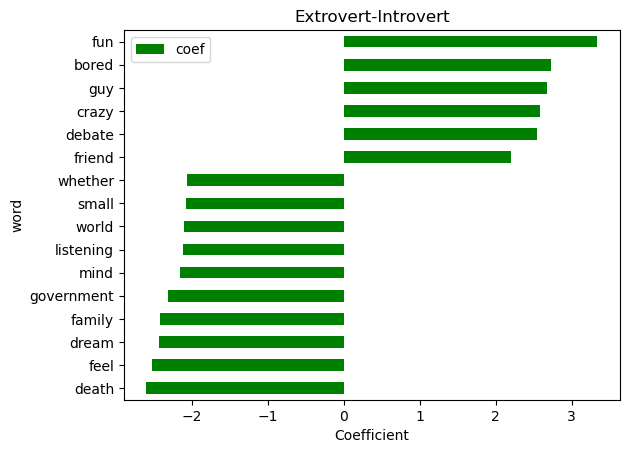

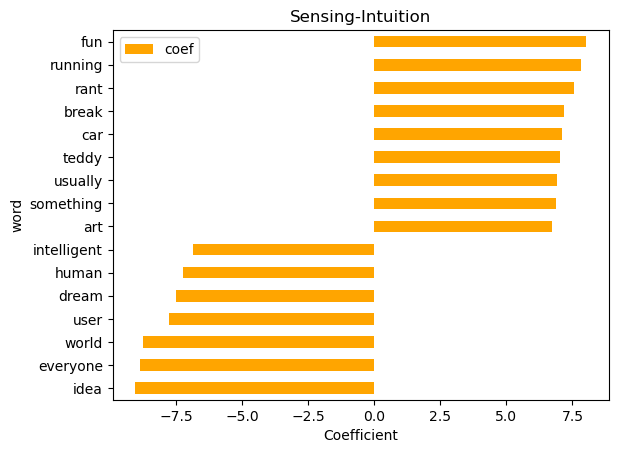

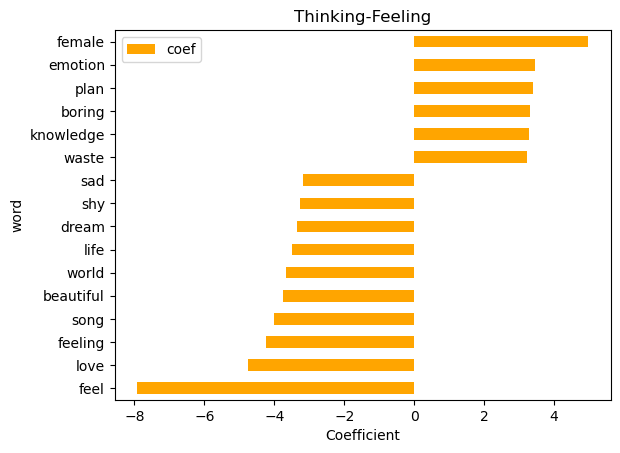

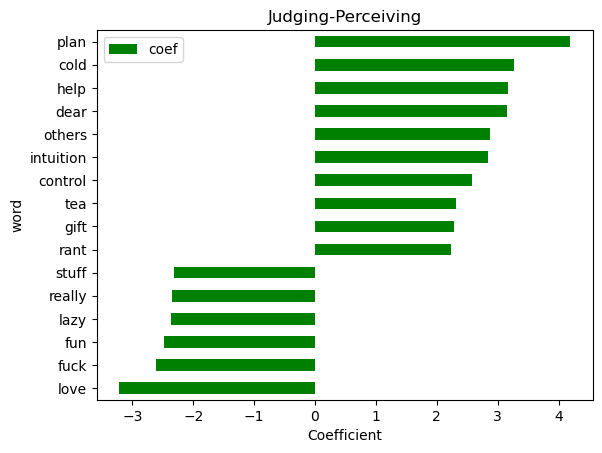

In [237]:
final_model = imb_make_pipeline(preprocessor, RandomUnderSampler(), LogisticRegressionCV(penalty='l2', solver='liblinear', max_iter=1000, Cs=10))

for col in y_tfidf.columns:
    
    print(mbti_type[col])

    # target variable
    target = y_tfidf[col]
    print(target)
    try:
        # fit pipeline on entire dataset
        final_model.fit(X_tfidf, target)

        # get feature importance
        coef = final_model[-1].coef_[0]  
        word = final_model[0].named_transformers_["tfidf"].get_feature_names_out()
        word_list = list(zip(word, coef))         
        result = pd.DataFrame(word_list, columns=["word", "coef"]).set_index("word")    
        result = result.reindex(result.coef.abs().sort_values(ascending=False).index)[0:16]
        print(result)
        colors = ["orange" if c < 0 else "green" for c in result["coef"]]

        # plot feature importance
#         result["coef"] = result["coef"].apply(lambda x: abs(x))
        result.sort_values("coef", inplace=True)
        ax = result.plot(kind="barh", color=colors, title=mbti_type[col])
        ax.set_xlabel("Coefficient")
    except Exception as e:
        print(f"Error occurred for {mbti_type[col]}: {e}")
